In [1]:
from scipy import spatial
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
# a class to store and calculate color
class Color:
    weight = np.array([1.0, 1.0, 1.0])
    
    # convert hex string into actual rgb values on init
    def __init__(self, color_hex):
        self.r = int(color_hex[-6:-4], 16)
        self.g = int(color_hex[-4:-2], 16)
        self.b = int(color_hex[-2:], 16)
        self.hex = color_hex
    
    def get_attr(self):
        return np.array([self.r, self.g, self.b])
    
    def get_distance_cosine(self, color):
        if np.any(self.get_attr()) and np.any(color.get_attr()) and not np.all(np.equal(self.get_attr(), color.get_attr())):
            return spatial.distance.cosine(self.get_attr(), color.get_attr(), Color.weight)
        else:
            return 2  # some value that would not be considered when taking minimum
    
    def get_distance_euclidean(self, color):
        if not np.all(np.equal(self.get_attr(), color.get_attr())):
            return spatial.distance.euclidean(self.get_attr(), color.get_attr(), Color.weight)
        else:
            return 2
    
    def get_distance_chebyshev(self, color):
        if not np.all(np.equal(self.get_attr(), color.get_attr())):
            return spatial.distance.chebyshev(self.get_attr(), color.get_attr(), Color.weight)
        else:
            return 2
    
    def get_distance_correlation(self, color):
        if np.any(self.get_attr() - np.mean(self.get_attr())) and np.any(color.get_attr() - np.mean(color.get_attr())) \
        and not np.all(np.equal(self.get_attr(), color.get_attr())):
            return spatial.distance.correlation(self.get_attr(), color.get_attr(), Color.weight)
        else:
            return 2

In [3]:
# get raw json data from the link provided on Canvas
df = pd.read_json("https://raw.githubusercontent.com/dariusk/corpora/master/data/colors/xkcd.json")

# change data into dictionary of "name(str) : color(Color)"
data = {list(x.values())[0] : Color(list(x.values())[1]) for x in df.colors.values}
length = len(data.values())

# get data for plotting
red = [x.r for x in data.values()]
green = [x.g for x in data.values()]
blue = [x.b for x in data.values()]
rgb = [x.hex for x in data.values()]

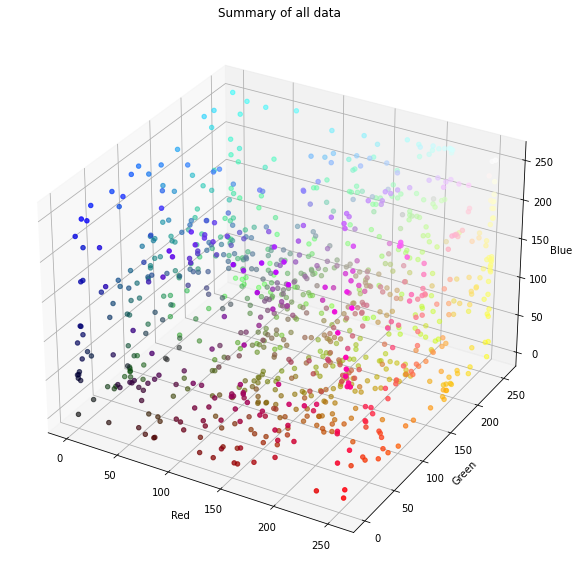

In [4]:
# plot data in 3d with rgb axes in corresponding color
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(red, green, blue, c=rgb)
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title("Summary of all data")
plt.show()

In [5]:
# compute distance matrix (this takes about 5min)
cosine_dist = np.array([[x.get_distance_cosine(y) for y in data.values()] for x in data.values()])
euclidean_dist = np.array([[x.get_distance_euclidean(y) for y in data.values()] for x in data.values()])
chebyshev_dist = np.array([[x.get_distance_chebyshev(y) for y in data.values()] for x in data.values()])
correlation_dist = np.array([[x.get_distance_correlation(y) for y in data.values()] for x in data.values()])

5 group of names that have the smallest distance in color (cosine):
(dark red, red)
(baby puke green, bile)
(mahogany, deep red)
(blood, fire engine red)
(dusty blue, cadet blue)


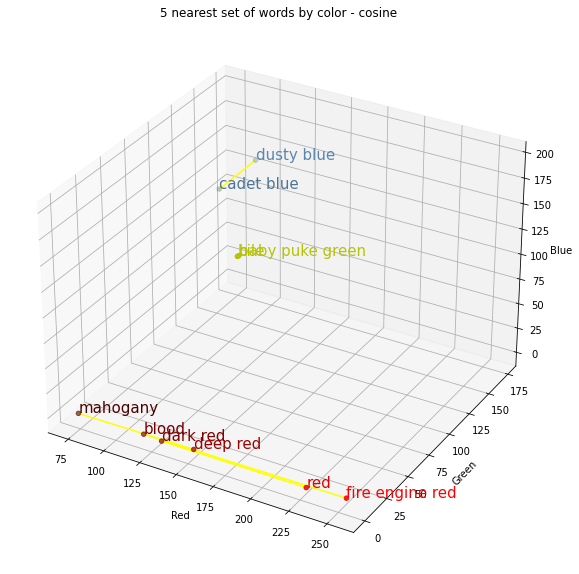

In [6]:
# get data for plotting - cosine
num = 5
indexes = cosine_dist.argsort(axis=None)[:num * 2:2]
x_index, y_index = indexes // length, indexes % length
red, blue, green = [np.array([getattr(list(data.values())[x], attr) for x in np.append(x_index, y_index)]) for attr in ["r", "g", "b"]]
rgb = [list(data.values())[x].hex for x in np.append(x_index, y_index)]
notes = [list(data.keys())[x] for x in np.append(x_index, y_index)]
lines = [[red[[i, i+5]], green[[i, i+5]], blue[[i, i+5]]] for i in range(5)]

# print out the set of nearest words
print("5 group of names that have the smallest distance in color (cosine):")
for i in range(5):
    print(f"({list(data.keys())[x_index[i]]}, {list(data.keys())[y_index[i]]})")

# plotting
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(red, green, blue, c=rgb)
for i, note in enumerate(notes):
    ax.text(red[i], green[i], blue[i], note, None, c=rgb[i], fontsize=15)
for i, line in enumerate(lines):
    ax.plot(*line, c='yellow')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title("5 nearest set of words by color - cosine")
plt.show()

5 group of names that have the smallest distance in color (correlation):
(deep rose, rosa)
(pale green, grey/green)
(creme, pale yellow)
(silver, jungle green)
(cloudy blue, light navy blue)


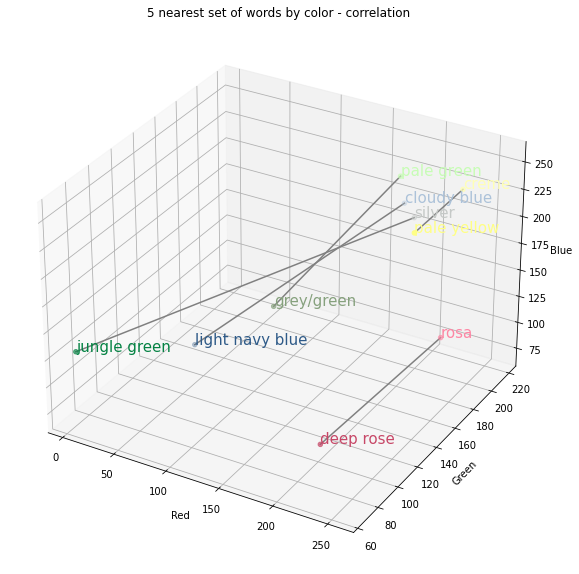

In [7]:
# get data for plotting - correlation
num = 5
indexes = correlation_dist.argsort(axis=None)[:num * 2:2]
x_index, y_index = indexes // length, indexes % length
red, blue, green = [np.array([getattr(list(data.values())[x], attr) for x in np.append(x_index, y_index)]) for attr in ["r", "g", "b"]]
rgb = [list(data.values())[x].hex for x in np.append(x_index, y_index)]
notes = [list(data.keys())[x] for x in np.append(x_index, y_index)]
lines = [[red[[i, i+5]], green[[i, i+5]], blue[[i, i+5]]] for i in range(5)]

# print out the set of nearest words
print("5 group of names that have the smallest distance in color (correlation):")
for i in range(5):
    print(f"({list(data.keys())[x_index[i]]}, {list(data.keys())[y_index[i]]})")

# plotting
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(red, green, blue, c=rgb)
for i, note in enumerate(notes):
    ax.text(red[i], green[i], blue[i], note, None, c=rgb[i], fontsize=15)
for i, line in enumerate(lines):
    ax.plot(*line, c='grey')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title("5 nearest set of words by color - correlation")
plt.show()

In [8]:
# get raw json data from the link provided on Canvas
with open("all_words_subtlex_large.json") as file:
    df = json.load(file)

In [9]:
dictionary = {}

class Word: 
    def __init__(self, row):
        self.word = row[0]
        self.subtitle_freq = row[1]
        self.web_freq = row[2]
        self.syllables = row[3].split(" ")
        self.pos_pct = row[4]
        self.pos = row[5]
        self.vec_pronunciation = [float(x) for  x in row[6].split(" ")]
        self.vec_meaning = [float(x) for  x in row[7].split(" ")]
        # Store this
        dictionary[self.word] = self

In [10]:
# initialize and store all words
all_words = [Word(row) for row in df] 

In [11]:
# define functions for getting distances between words
def trim_word(word):
    all_words = word.split(" ")
    words = []
    for w in all_words:
        if w.upper() in dictionary.keys() and dictionary[w.upper()].pos in ["Noun", "Adjective", "Adverb"]:
            words.append(w)
    return words
        
def get_distance(word0, word1, combine_method=np.mean, dist_method=spatial.distance.cosine):
    words0, words1 = trim_word(word0), trim_word(word1)
    if len(words0) != 0 and len(words1) != 0 and word0 != word1:
        meaning0 = combine_method([dictionary[word.upper()].vec_meaning for word in words0], axis=0)
        meaning1 = combine_method([dictionary[word.upper()].vec_meaning for word in words1], axis=0)
        return dist_method(meaning0, meaning1)
    else:
        return 2

In [12]:
# compute distance matrix (this takes about 1min)
word_dist_cosine = np.array([[get_distance(x, y) for y in data.keys()] for x in data.keys()])

5 group of names that have the smallest distance in meaning (cosine):
(blue, seafoam blue)
(red violet, orangey red)
(red brown, pinky red)
(teal green, green teal)
(red violet, purplish red)


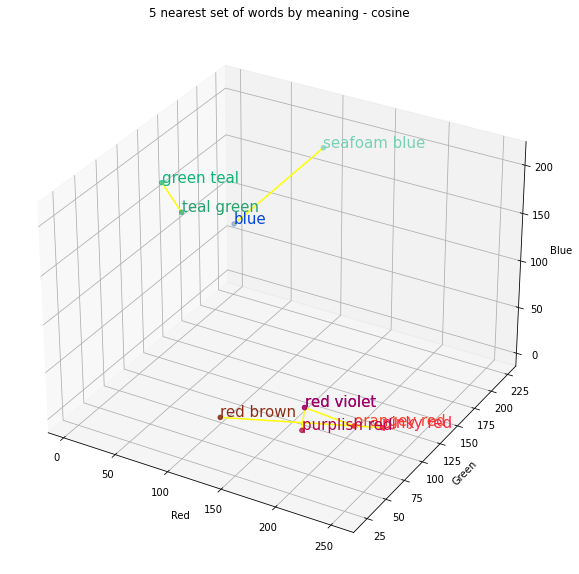

In [13]:
# get data for plotting - cosine
num = 5
indexes = word_dist_cosine.argsort(axis=None)[:num * 2:2]
x_index, y_index = indexes // length, indexes % length
red, blue, green = [np.array([getattr(list(data.values())[x], attr) for x in np.append(x_index, y_index)]) for attr in ["r", "g", "b"]]
rgb = [list(data.values())[x].hex for x in np.append(x_index, y_index)]
notes = [list(data.keys())[x] for x in np.append(x_index, y_index)]
lines = [[red[[i, i+5]], green[[i, i+5]], blue[[i, i+5]]] for i in range(5)]

# print out the set of nearest words
print("5 group of names that have the smallest distance in meaning (cosine):")
for i in range(5):
    print(f"({list(data.keys())[x_index[i]]}, {list(data.keys())[y_index[i]]})")

# plotting
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(red, green, blue, c=rgb)
for i, note in enumerate(notes):
    ax.text(red[i], green[i], blue[i], note, None, c=rgb[i], fontsize=15)
for i, line in enumerate(lines):
    ax.plot(*line, c='yellow')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title("5 nearest set of words by meaning - cosine")
plt.show()

In [14]:
# repeat the same for correlation (this takes about 1min)
word_dist_correlation = np.array([[get_distance(x, y, dist_method=spatial.distance.correlation) for y in data.keys()] for x in data.keys()])

5 group of names that have the smallest distance in meaning (correlation):
(minty green, moss green)
(light bluish green, light yellowish green)
(dark taupe, dark periwinkle)
(orangey red, red brown)
(violet blue, purplish blue)


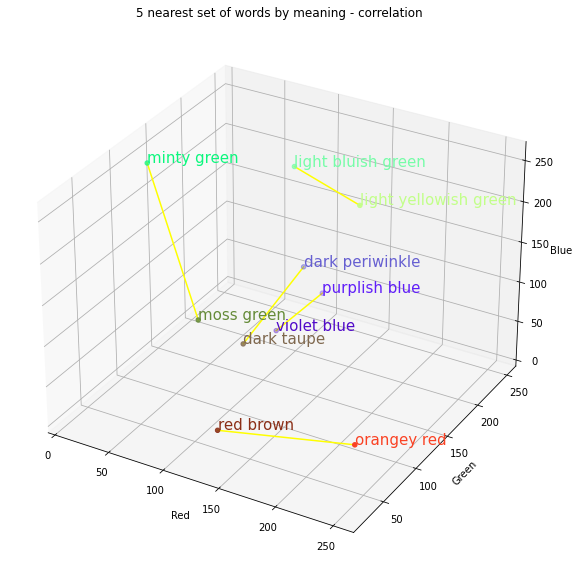

In [15]:
# get data for plotting - correlation
num = 5
indexes = word_dist_correlation.argsort(axis=None)[:num * 2:2]
x_index, y_index = indexes // length, indexes % length
red, blue, green = [np.array([getattr(list(data.values())[x], attr) for x in np.append(x_index, y_index)]) for attr in ["r", "g", "b"]]
rgb = [list(data.values())[x].hex for x in np.append(x_index, y_index)]
notes = [list(data.keys())[x] for x in np.append(x_index, y_index)]
lines = [[red[[i, i+5]], green[[i, i+5]], blue[[i, i+5]]] for i in range(5)]

# print out the set of nearest words
print("5 group of names that have the smallest distance in meaning (correlation):")
for i in range(5):
    print(f"({list(data.keys())[x_index[i]]}, {list(data.keys())[y_index[i]]})")

# plotting
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(red, green, blue, c=rgb)
for i, note in enumerate(notes):
    ax.text(red[i], green[i], blue[i], note, None, c=rgb[i], fontsize=15)
for i, line in enumerate(lines):
    ax.plot(*line, c='yellow')
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.title("5 nearest set of words by meaning - correlation")
plt.show()